In [67]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reproducibility!
rand.seed(47)
mpl.rc('font', size=18)

## Particle Distribution

In [68]:
nparticles = int(1E5)

scaleh = 1.0
# Populate out to 7 times the scale height
nscaleh = 7

scalew = 1

# x and y are randomly distributed between -1,1
x = (rand.random(nparticles)) * scalew
y = (rand.random(nparticles)) * scalew
z =  np.zeros(nparticles)

# Populate particle z with random numbers using the teqniques given in random_numbers_with_distributions.ipynb notebook
for n in range(nparticles):
    while True:
        randf = rand.random() * nscaleh * scaleh
        # Normalize to keep probabily 1 
        pkeep_norm = scaleh / (1 - np.exp(- nscaleh))
        # probability \proto exp^{-z / H}
        pkeep = pkeep_norm * np.exp(- randf / scaleh) 
        
        if rand.random() <= pkeep:
            z[n] = randf
            break    

Text(0.5, 0, 'z / L')

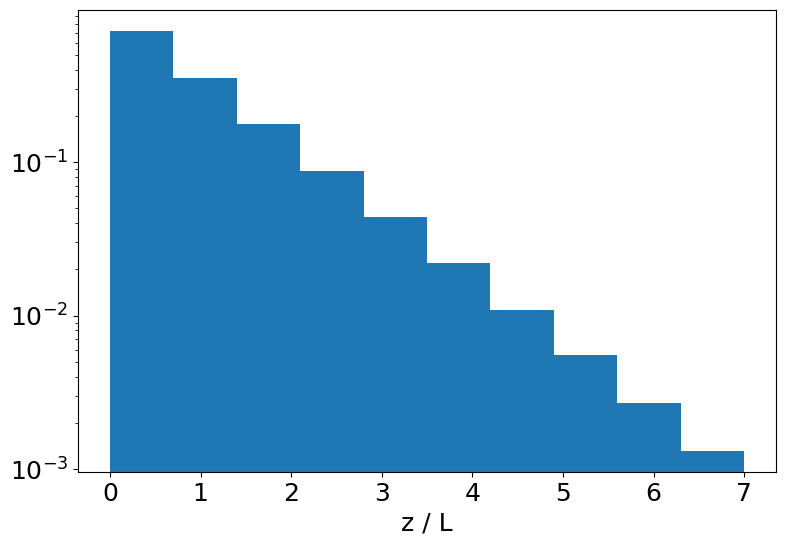

In [74]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(z, bins=10, density=True)
ax.set_yscale("log")

ax.set_xlabel("z / L")

When the y-axis is log scaled an exponential becomes a linear function. So we are getting an exponential probability density

## Photons entering the atmosphere

In [70]:
nphotons = 20000

# Cross section impact parameter, b
b = 0.008

xp = (rand.random(nphotons)) * scalew
yp = (rand.random(nphotons)) * scalew 

zcol = np.zeros(nphotons)

for n, (_xp, _yp) in enumerate(zip(xp, yp)):
    projd = np.sqrt((x - _xp)**2 + (y - _yp)**2)

    # First particle to hit is the particle with the largest z that is withing radius 
    # If particle does not impact, set it collision z to -1
    zcol[n] = np.max(np.insert(z[projd < b], 0, -1)) 
# remove instances where no collisions hapened
zcol = zcol[zcol > 0]

Text(0.5, 0, 'z / L')

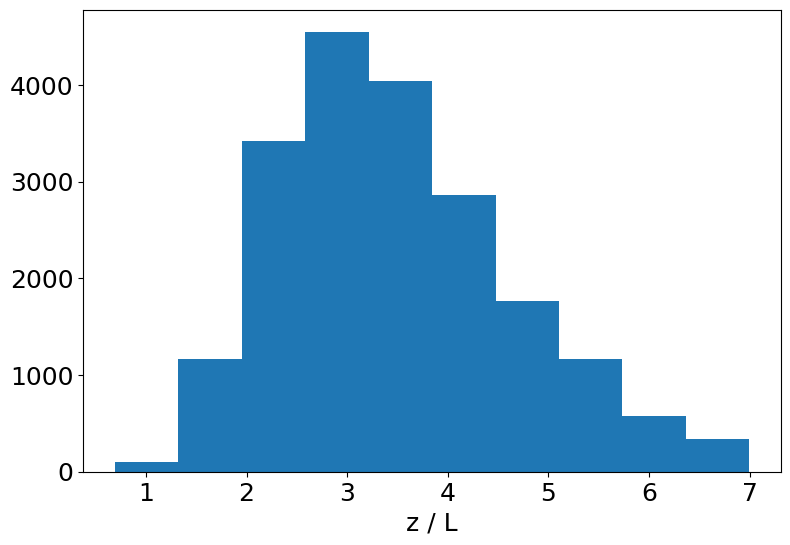

In [73]:
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(zcol)
ax.set_xlabel("z / L")

Most photons are absorbed at z / H ~ 3

## Order of magnitude estimate

A photon is on average absorbed if the optical depth is ~1, so where the atmosphere has an optical depth of 1 is where most photons should be absorbed.

The optical depth in the atmosphere is approximately 
$
\tau ~ n(z) \sigma H
$
$\tau$ should depend on from order of magnitude \sigma gives the cross-section, how the number of particles and how fast the number of particles is changing.


In [93]:
density_surface = np.sum((z > 0) & (z < 1)) 
print(density_surface)
cross_section = np.pi * b**2
print(cross_section)

tauapprox = lambda z: density_surface * np.exp(-z / scaleh) * cross_section * scaleh

# Optical depth at 3, where most photons are absorbed
print(tauapprox(3))

63247
0.00020106192982974675
0.6331204350958328


Optical depth is close to 1 as expected

In [94]:
# Optical depths where less photons are absorbed are further from 1
print(tauapprox(0))
print(tauapprox(5))

12.716563875941992
0.08568353340658201
